In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from google.colab import files
import seaborn as sns
import xgboost

In [ ]:
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
df_train = pd.read_csv('train.csv')

In [ ]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
df_train.isnull().sum()
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [ ]:
df_train['Product_Category_2'].fillna(0, inplace=True)
df_train['Product_Category_3'].fillna(0, inplace=True)

In [ ]:
df_test['Product_Category_2'].fillna(0, inplace=True)
df_test['Product_Category_3'].fillna(0, inplace=True)

In [ ]:
df_train['Product_Category_2'] = df_train['Product_Category_2'].astype(int)
df_train['Product_Category_3'] = df_train['Product_Category_3'].astype(int)

In [ ]:
df_test['Product_Category_2'] = df_train['Product_Category_2'].astype(int)
df_test['Product_Category_3'] = df_train['Product_Category_3'].astype(int)

In [ ]:
df1_train = df_train.copy(deep=True)

In [ ]:
df1_test = df_test.copy(deep=True)

In [ ]:
df1_train.loc[df1_train['Gender'] == 'F', 'Gender'] = 0
df1_train.loc[df1_train['Gender'] == 'M', 'Gender'] = 1

In [ ]:
df1_train.loc[df1_train['Gender'] == 'F', 'Gender'] = 0
df1_train.loc[df1_train['Gender'] == 'M', 'Gender'] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [ ]:
df1_train.loc[df1_train['Age'] == '0-17', 'Age'] = 0
df1_train.loc[df1_train['Age'] == '18-25', 'Age'] = 1
df1_train.loc[df1_train['Age'] == '26-35', 'Age'] = 2
df1_train.loc[df1_train['Age'] == '36-45', 'Age'] = 3
df1_train.loc[df1_train['Age'] == '46-50', 'Age'] = 4
df1_train.loc[df1_train['Age'] == '51-55', 'Age'] = 5
df1_train.loc[df1_train['Age'] == '55+', 'Age'] = 6

In [ ]:
df1_test.loc[df1_train['Age'] == '0-17', 'Age'] = 0
df1_test.loc[df1_train['Age'] == '18-25', 'Age'] = 1
df1_test.loc[df1_train['Age'] == '26-35', 'Age'] = 2
df1_test.loc[df1_train['Age'] == '36-45', 'Age'] = 3
df1_test.loc[df1_train['Age'] == '46-50', 'Age'] = 4
df1_test.loc[df1_train['Age'] == '51-55', 'Age'] = 5
df1_test.loc[df1_train['Age'] == '55+', 'Age'] = 6

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [ ]:
df1_train.loc[df1_train['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4

In [ ]:
df1_test.loc[df1_train['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [ ]:
df1_train.loc[df1_train['City_Category'] == 'A', 'City_Category'] = 0
df1_train.loc[df1_train['City_Category'] == 'B', 'City_Category'] = 1
df1_train.loc[df1_train['City_Category'] == 'C', 'City_Category'] = 2


In [ ]:
df1_test.loc[df1_train['City_Category'] == 'A', 'City_Category'] = 0
df1_test.loc[df1_train['City_Category'] == 'B', 'City_Category'] = 1
df1_test.loc[df1_train['City_Category'] == 'C', 'City_Category'] = 2


In [ ]:
df1_train['Gender'] = df1_train['Gender'].astype(int)
df1_train['Age'] = df1_train['Age'].astype(int)
df1_train['City_Category'] = df1_train['City_Category'].astype(int)
df1_train['Stay_In_Current_City_Years'] = df1_train['Stay_In_Current_City_Years'].astype(int)

In [ ]:
df1_test['Gender'] = df1_train['Gender'].astype(int)
df1_test['Age'] = df1_train['Age'].astype(int)
df1_test['City_Category'] = df1_train['City_Category'].astype(int)
df1_test['Stay_In_Current_City_Years'] = df1_train['Stay_In_Current_City_Years'].astype(int)

In [ ]:
df1_train.isnull().sum()
df1_test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [ ]:
conditions = [
    (df1_train['Product_Category_1'] != 0) & (df1_train['Product_Category_2'] == 0) & (df1_train['Product_Category_3'] == 0),
    (df1_train['Product_Category_1'] != 0) & (df1_train['Product_Category_2'] != 0) & (df1_train['Product_Category_3'] == 0),
    (df1_train['Product_Category_1'] != 0) & (df1_train['Product_Category_2'] != 0) & (df1_train['Product_Category_3'] != 0)]
choices = [1, 2, 3]
df1_train['Category_Count'] = np.select(conditions, choices, default=0)

In [ ]:
conditions = [
    (df1_test['Product_Category_1'] != 0) & (df1_test['Product_Category_2'] == 0) & (df1_test['Product_Category_3'] == 0),
    (df1_test['Product_Category_1'] != 0) & (df1_test['Product_Category_2'] != 0) & (df1_test['Product_Category_3'] == 0),
    (df1_test['Product_Category_1'] != 0) & (df1_test['Product_Category_2'] != 0) & (df1_test['Product_Category_3'] != 0)]
choices = [1, 2, 3]
df1_test['Category_Count'] = np.select(conditions, choices, default=0)

In [ ]:
df1_train['Product_Score'] = 0.0
required_product_data = df1_train[['Product_ID', 'Product_Score']]
required_product_data.head()

,Product_ID,Product_Score
0,P00069042,0.0
1,P00248942,0.0
2,P00087842,0.0
3,P00085442,0.0
4,P00285442,0.0


In [ ]:
df1_test['Product_Score'] = 0.0
required_product_data_test = df1_test[['Product_ID', 'Product_Score']]
required_product_data_test.head()

,Product_ID,Product_Score
0,P00128942,0.0
1,P00113442,0.0
2,P00288442,0.0
3,P00145342,0.0
4,P00053842,0.0


In [ ]:
required_product_data['Frequency']=1
required_product_data.head()
grouped_product_data = required_product_data.groupby(['Product_ID']).sum()
grouped_product_data = grouped_product_data.reset_index()
#grouped_product_data=grouped_product_data.drop(grouped_product_data.index[0])
grouped_product_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Product_ID,Product_Score,Frequency
0,P00000142,0.0,1152
1,P00000242,0.0,376
2,P00000342,0.0,244
3,P00000442,0.0,92
4,P00000542,0.0,149


In [ ]:
required_product_data_test['Frequency']=1
required_product_data_test.head()
grouped_product_data_test = required_product_data_test.groupby(['Product_ID']).sum()
grouped_product_data_test = grouped_product_data_test.reset_index()
#grouped_product_data=grouped_product_data.drop(grouped_product_data.index[0])
grouped_product_data_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Product_ID,Product_Score,Frequency
0,P00000142,0.0,484
1,P00000242,0.0,170
2,P00000342,0.0,105
3,P00000442,0.0,34
4,P00000542,0.0,80


In [ ]:
max_frequency = grouped_product_data['Frequency'].max()
final_product_data = grouped_product_data[['Product_ID', 'Product_Score', 'Frequency']]

for index, row in final_product_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_product_data.loc[index,'Product_Score']=product_score


In [ ]:
max_frequency = grouped_product_data_test['Frequency'].max()
final_product_data_test = grouped_product_data_test[['Product_ID', 'Product_Score', 'Frequency']]

for index, row in final_product_data_test.iterrows():
    product_score_test = (float(row['Frequency']) / float(max_frequency))
    final_product_data_test.loc[index,'Product_Score'] = product_score

In [ ]:
for index, row in df1_test.iterrows():
    p_score = final_product_data_test.loc[final_product_data_test.Product_ID == row['Product_ID'], 'Product_Score'].values[0]
    df1_test.loc[index,'Product_Score'] = p_score

In [ ]:
#cols = list(df1_train)
cols_test = list(df1_test)

# move the column to head of list using index, pop and insert
cols.insert(14, cols.pop(cols.index('Purchase')))

# shows all the columns after 3 new features have been added
cols

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Category_Count',
 'Product_Score',
 'Purchase']

In [ ]:
df1_train.to_csv('train1.csv')

In [ ]:
df1_test.to_csv('test1.csv')

In [ ]:
files.download('train1.csv')

In [ ]:
files.download('test1.csv')

In [ ]:
df1_train = df1_train.loc[:, cols]
df1_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,1,0.120745,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,3,0.309043,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1,0.054255,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,2,0.181383,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,1,0.107979,7969


In [ ]:
df1_train.corr()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score,Purchase
User_ID,1.000000,-0.033474,0.032698,-0.023971,0.022859,-0.030737,0.020443,0.003825,0.003896,0.003605,0.004270,0.003688,0.004716
Gender,-0.033474,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.000954,0.036146,0.026808,0.020456,0.060346
Age,0.032698,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.018770,-0.007422,-0.021246,-0.020741,0.015839
Occupation,-0.023971,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.006712,0.012269,0.011600,0.011679,0.020833
City_Category,0.022859,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,0.016003,0.035525,0.040739,0.109546,0.061914
Stay_In_Current_City_Years,-0.030737,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.001262,0.001977,0.002735,0.001470,0.005422
Marital_Status,0.020443,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.001099,-0.004629,-0.011257,-0.010415,-0.000463
Product_Category_1,0.003825,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.067877,-0.385534,-0.518270,-0.205178,-0.343703
Product_Category_2,0.003896,-0.000954,0.018770,0.006712,0.016003,0.001262,0.001099,-0.067877,1.000000,0.094750,0.444873,0.098062,0.052288
Product_Category_3,0.003605,0.036146,-0.007422,0.012269,0.035525,0.001977,-0.004629,-0.385534,0.094750,1.000000,0.791044,0.262332,0.288501


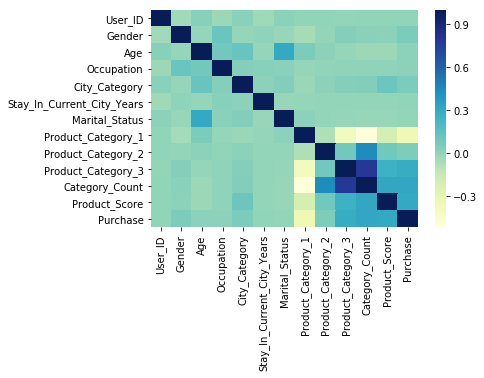

In [ ]:
sns.heatmap(data=df1_train.corr(), cmap="YlGnBu")


In [ ]:
#df2_train = df1_train.copy(deep=True)

In [ ]:
X = df1_train.drop(['Purchase','Product_ID'], axis=1)
y = df1_train['Purchase']


In [ ]:
X.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score
0,1000001,0,0,10,0,2,0,3,0,0,1,0.120745
1,1000001,0,0,10,0,2,0,1,6,14,3,0.309043
2,1000001,0,0,10,0,2,0,12,0,0,1,0.054255
3,1000001,0,0,10,0,2,0,12,14,0,2,0.181383
4,1000002,1,6,16,2,4,0,8,0,0,1,0.107979


In [ ]:
x_test = df1_test.drop(['Product_ID','Purchase'],axis=1)
x_test.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score
0,1000004,0,0,7,0,2,1,1,0,0,1,0.007447
1,1000009,0,0,17,0,2,0,3,6,14,3,0.007447
2,1000010,0,0,1,0,2,1,5,0,0,1,0.007447
3,1000010,0,0,1,0,2,1,4,14,0,2,0.007447
4,1000011,1,6,1,2,4,0,4,0,0,1,0.007447


In [ ]:
x_test.shape

(233599, 13)

In [ ]:
xgb1 = xgboost.XGBRegressor(n_estimators=500, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=5)
xgb2 = xgboost.XGBRegressor(n_estimators=800, learning_rate=0.05, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=8)
xgb3 = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=10)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Gender                        550068 non-null int64
Age                           550068 non-null int64
Occupation                    550068 non-null int64
City_Category                 550068 non-null int64
Stay_In_Current_City_Years    550068 non-null int64
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null int64
Product_Category_3            550068 non-null int64
Category_Count                550068 non-null int64
Product_Score                 550068 non-null float64
dtypes: float64(1), int64(11)
memory usage: 50.4 MB


In [ ]:
xgb1.fit(X,y)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:05:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [ ]:
xgb2.fit(X,y)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:10:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [ ]:
xgb3.fit(X,y)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [ ]:
# predictions1 = xgb1.predict(x_test)
# predictions2 = xgb2.predict(x_test)
# predictions3 = xgb3.predict(x_test)
predictions = ((predictions1+predictions2+predictions3)/3)


In [ ]:
xgboostsolution = df1_test[['User_ID','Product_ID']]
xgboostsolution['Purchase'] = predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
xgboostsolution.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,11803.257812
1,1000009,P00113442,9757.086914
2,1000010,P00288442,5428.381348
3,1000010,P00145342,2396.988037
4,1000011,P00053842,1596.624878


In [ ]:
xgboostsolution.to_csv('submission.csv')

In [ ]:
files.download('submission.csv')